In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
import matplotlib
from pylab import *
import numpy as np
from scipy.optimize import curve_fit

pass

In [4]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

## cell plating
### data

In [28]:
OD = np.array([0.165, 0.339, 0.554])

YG_A = np.array([99,96])
YG_B = np.array([125,96])

PK_A = np.array([88,86])
PK_B = np.array([97,87])

YY_A = np.array([100,85])
YY_B = np.array([145,111])

TN_all = np.array([109,99,96]) #from dilution series A of each person

YG = np.concatenate([YG_A, YG_B, TN_all[0:1]])
PK = np.concatenate([PK_A, PK_B, TN_all[1:2]])
YY = np.concatenate([YY_A, YY_B, TN_all[2:3]])

Text(0.5, 1.0, 'error between dilution series')

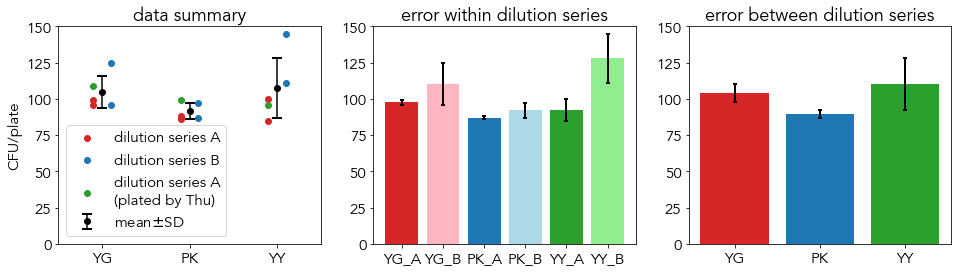

In [32]:
plt.figure(figsize=(16,4))

##################### data summary #####################
subplot(1,3,1)

#mean and SD
k = 0; x_loc = 0.5; 
for i in (YG, PK, YY):
    if k == 0:
        plt.errorbar(x_loc, np.mean(i), yerr = np.std(i), fmt = 'o', capsize=5, capthick=2, color='black',label=r'mean$\pm$SD')
    else: 
        plt.errorbar(x_loc, np.mean(i), yerr = np.std(i), fmt = 'o', capsize=5, capthick=2, color='black')
    x_loc += 1; k += 1;
labels = ['YG', 'PK', 'YY'];
plt.xticks([0.5,1.5,2.5], labels) 

#scatter plot
x_loc2 = [0.4,0.6,1.4,1.6,2.4,2.6]
colors = ['tab:red','tab:blue','tab:red','tab:blue','tab:red','tab:blue']
labels = ['dilution series A','dilution series B','dilution series A','dilution series B','dilution series A','dilution series B']
k = 0; 
for i in (YG_A, YG_B, PK_A, PK_B, YY_A, YY_B):
    if k < 2:
        plt.scatter(np.array([x_loc2[k],x_loc2[k]]), i, color = colors[k], label=labels[k]); 
    else:
        plt.scatter(np.array([x_loc2[k],x_loc2[k]]), i, color = colors[k]); 
    k += 1;

k = 0;
x_loc2 = [0.4,1.4,2.4]; 
for i in TN_all:
    if k == 0:
        plt.scatter(x_loc2[k], i, color = 'tab:green', label='dilution series A\n(plated by Thu)'); 
    else:
        plt.scatter(x_loc2[k], i, color = 'tab:green');
    k += 1;
plt.legend()

plt.ylabel('CFU/plate')
plt.ylim((0,150))
plt.xlim((0,3))
plt.title('data summary',fontsize=18)

##################### within dilution series #####################
subplot(1,3,2) 

colors = ['tab:red','lightpink','tab:blue','lightblue','tab:green','lightgreen']
labels = ['YG_A','YG_B','PK_A','PK_B','YY_A','YY_B']
k = 0;
x = np.arange(6)
for i in (YG_A,YG_B,PK_A,PK_B,YY_A,YY_B):
    plt.bar(x[k],np.mean(i),yerr=np.std(i),error_kw=dict(lw=2, capsize=2, capthick=2),color = colors[k], label=labels[k]);
    k += 1;
    
plt.ylim((0,150))
plt.xticks([r for r in range(6)], labels)
plt.title('error within dilution series',fontsize=18)


##################### comparison with Poisson error #####################
subplot(1,3,3) 

YG_between = np.array([np.mean(YG_A), np.mean(YG_B)])
PK_between = np.array([np.mean(PK_A), np.mean(PK_B)])
YY_between = np.array([np.mean(YY_A), np.mean(YY_B)])

colors = ['tab:red','tab:blue','tab:green']
labels = ['YG','PK','YY']
k = 0;
x = np.arange(3)
for i in (YG_between,PK_between,YY_between):
    plt.bar(x[k],np.mean(i),yerr=np.std(i),error_kw=dict(lw=2, capsize=2, capthick=2),color = colors[k], label=labels[k]);
    k += 1;
    
plt.ylim((0,150))
plt.xticks([r for r in range(3)], labels)
plt.title('error between dilution series',fontsize=18)


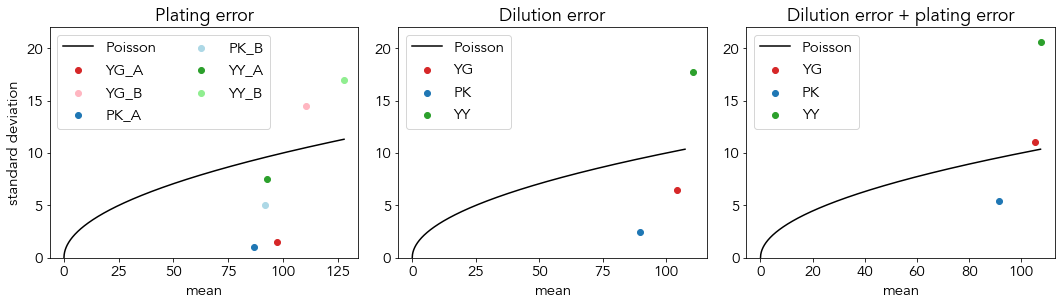

In [52]:
plt.figure(figsize=(15,4.5))
##################### comparison with Poisson error #####################
subplot(1,3,1)
x_poisson = np.arange(0,np.mean(YY_B),0.1)
y_poisson = np.sqrt(x_poisson)

colors = ['tab:red','lightpink','tab:blue','lightblue','tab:green','lightgreen']
labels = ['YG_A','YG_B','PK_A','PK_B','YY_A','YY_B']
k = 0;
for i in (YG_A,YG_B,PK_A,PK_B,YY_A,YY_B):
    plt.scatter(np.mean(i), np.std(i), label=labels[k], color=colors[k])
    k = k+1;
plt.plot(x_poisson,y_poisson, color = 'black', label='Poisson')
plt.xlabel('mean')
plt.ylabel('standard deviation')
plt.title('Plating error',fontsize=18)
legend(ncol=2)
plt.ylim(0,22)

subplot(1,3,2)
x_poisson = np.arange(0,np.mean(YY),0.1)
y_poisson = np.sqrt(x_poisson)

labels = ['YG','PK','YY'];
colors = ['tab:red','tab:blue','tab:green']
k = 0;
for i in (YG_between,PK_between,YY_between):
    plt.scatter(np.mean(i), np.std(i), label=labels[k], color=colors[k])
    k = k+1;
plt.plot(x_poisson,y_poisson, color = 'black', label='Poisson')
plt.xlabel('mean')
#plt.ylabel('standard deviation')
plt.title('Dilution error',fontsize=18)
legend(ncol=1)
plt.ylim(0,22)

subplot(1,3,3) 

x_poisson = np.arange(0,np.mean(YY),0.1)
y_poisson = np.sqrt(x_poisson)

labels = ['YG','PK','YY'];
colors = ['tab:red','tab:blue','tab:green']
k = 0;
for i in (YG, PK, YY):
    plt.scatter(np.mean(i), np.std(i), label=labels[k], color=colors[k])
    k = k+1;
plt.plot(x_poisson,y_poisson, color = 'black', label='Poisson')
plt.xlabel('mean')
#plt.ylabel('standard deviation')
plt.title('Dilution error + plating error',fontsize=18)
legend(ncol=1)
plt.ylim(0,22)
tight_layout()